In [1]:
import pandas as pd
import numpy as np
#add other dependencies for visuals

In [2]:
#path_link="Data/Seasons_Episodes/output/charlines_df.csv"
#df_charlines = pd.read_csv(path_link)
df_charlines = pd.read_csv("/Users/jacquelineskunda/Documents/GitHub/696/Milestone2/Data/Seasons_Episodes/output/charlines_df.csv")

In [3]:
#df_charlines.info()

In [4]:
df_charlines.head(3)

Unnamed: 0  index Character Dialog  Season  Episode Fix Name Character_Fix  \
0           0      3    HOPPER    NaN       3        5     True        HOPPER   
1           0      3    HOPPER    NaN       3        5     True        HOPPER   
2           0      3    HOPPER    NaN       3        5     True        HOPPER   

  Spoke_Before Character_Keep  Length Dialog  
0          NaN           Keep              0  
1          NaN           Keep              0  
2          NaN           Keep              0

In [5]:
df_charlines.loc[df_charlines["Spoke_Before"].isnull(),'Spoke_Before'] = df_charlines['Character_Fix']

In [6]:
df_charlines.head(3)

Unnamed: 0  index Character Dialog  Season  Episode Fix Name Character_Fix  \
0           0      3    HOPPER    NaN       3        5     True        HOPPER   
1           0      3    HOPPER    NaN       3        5     True        HOPPER   
2           0      3    HOPPER    NaN       3        5     True        HOPPER   

  Spoke_Before Character_Keep  Length Dialog  
0       HOPPER           Keep              0  
1       HOPPER           Keep              0  
2       HOPPER           Keep              0

In [7]:
df_charlines.tail(3)

Unnamed: 0  index Character  \
6065          39    270   CLAUDIA   
6066          39    270   CLAUDIA   
6067          39    270   CLAUDIA   

                                                 Dialog  Season  Episode  \
6065                         Where did you see it last?       2        9   
6066  What's in there that's so important  anyway?  ...       2        9   
6067  That's your ride!  Dusty??? The bag from Melva...       2        9   

     Fix Name Character_Fix Spoke_Before Character_Keep  Length Dialog  
6065     True       CLAUDIA        SUSAN           Keep             26  
6066     True       CLAUDIA        SUSAN           Keep            132  
6067     True       CLAUDIA        SUSAN           Keep             75

In [8]:
df_charlines.dropna(subset=['Dialog'],inplace = True)

In [9]:
df_charlines.drop(['Unnamed: 0'], axis=1, inplace = True)
df_charlines.shape

(5457, 10)

In [10]:
df_charlines['Dialog_Check'] = df_charlines['Dialog'].apply(lambda x: x.isdigit())

In [11]:
df_charlines['Remove_Lines'] = df_charlines['Dialog'].apply(lambda x: True if "1/" in x else False)

In [12]:
#df_charlines[df_charlines['Remove_Lines']==True]
#removing odd script lines when based on location setting that were caught
df_charlines2 = df_charlines[df_charlines['Remove_Lines']==False].copy()

In [13]:
# reordering columns
cols = list(df_charlines2)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Character_Fix')))
#print(cols)
#['Character_Fix', 'Character', 'Dialog', 'Season', 'Episode', 'Fix Name', 'Length Dialog', 'Character_Keep', 
#'Dialog_Check', 'Remove_Lines']
# use index to reorder
df_charlines2 = df_charlines2.loc[:, cols]

In [14]:
df_charlines2.head(3)

Character_Fix  index Character  \
5        HOPPER      3    HOPPER   
6        HOPPER      3    HOPPER   
7        HOPPER      3    HOPPER   

                                              Dialog  Season  Episode  \
5  Looks like somebody’s home. As the truck parks...       3        5   
6  Where’s that coming from? Joyce pauses at the ...       3        5   
7  Hey, dipshits! The men drop their tools and st...       3        5   

  Fix Name Spoke_Before Character_Keep  Length Dialog  Dialog_Check  \
5     True       HOPPER           Keep            341         False   
6     True       HOPPER           Keep            165         False   
7     True       HOPPER           Keep             80         False   

   Remove_Lines  
5         False  
6         False  
7         False

In [15]:
df_charlines2.shape

(5451, 12)

In [16]:
df_charlines2.to_csv("/Users/jacquelineskunda/Documents/GitHub/696/Milestone2/Data/Seasons_Episodes/output/df_charlines_for_EDA.csv")

In [17]:
import plotly as py
import plotly.express as px
import numpy as np
import re
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from nltk import word_tokenize
import nltk
#nltk.download('punkt')
#sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

#order = df["Character_Fix"].unique()
#dialog = df["Dialog"]
#dialogCounts = dialog.value_counts()
#dialogCounts = dialogCounts.sort_values(ascending = False)[0:50]

In [18]:
df = df_charlines2.copy()
df['Dialog_clean'] = df['Dialog'].apply(lambda x: re.sub(r'[^\w\s]','',x))
df['Dialog_tokenized'] = df['Dialog_clean'].apply(lambda x: word_tokenize(x.strip().lower()))
df['Dialog_Count'] = df['Dialog_tokenized'].apply(lambda x: len(x))
LinesSpokeDf = df.groupby(['Character_Fix'])["Dialog_Count"].sum().reset_index()
LinesSpokeDf = LinesSpokeDf.sort_values(by=["Dialog_Count"], ascending = False)

In [19]:
_20df = LinesSpokeDf.head(20)

In [20]:
top20chars = list(_20df.Character_Fix.unique())

In [21]:
print(top20chars)

['HOPPER', 'MIKE', 'STEVE', 'DUSTIN', 'JOYCE', 'NANCY', 'ROBIN', 'MAX', 'JONATHAN', 'LUCAS', 'WILL', 'ELEVEN', 'MURRAY', 'BILLY', 'ERICA', 'KAREN', 'DR BRENNER', 'MAYOR KLINE', 'DR OWENS', 'TOM']


In [22]:
top20df = df[df['Character_Fix'].isin(top20chars)].copy()

In [23]:
print(list(top20df.Character_Fix.unique()))

['HOPPER', 'JOYCE', 'JONATHAN', 'ROBIN', 'STEVE', 'NANCY', 'TOM', 'MAX', 'ELEVEN', 'DUSTIN', 'ERICA', 'LUCAS', 'WILL', 'KAREN', 'MIKE', 'MURRAY', 'BILLY', 'MAYOR KLINE', 'DR BRENNER', 'DR OWENS']


In [24]:
top20dfv2 = top20df[top20df['Season']==3]

In [25]:
### DR BRENNER is assumed to be dead in season 3 so it makes sense he is not in the top 20
### characters for season 3 and then dr owens is only is season 2 and season 4 and we 
### briefly see him in season 3 but not speaking.

drb = top20df[top20df['Character_Fix']=="DR BRENNER"]
dro = top20df[top20df['Character_Fix']=="DR OWENS"]
print(drb.Season.unique())
print(dro.Season.unique())

[1 4]
[4 2]


In [26]:
print(list(top20dfv2.Character_Fix.unique()))

['HOPPER', 'JOYCE', 'JONATHAN', 'ROBIN', 'STEVE', 'NANCY', 'TOM', 'MAX', 'ELEVEN', 'DUSTIN', 'ERICA', 'LUCAS', 'WILL', 'KAREN', 'MIKE', 'MURRAY', 'BILLY', 'MAYOR KLINE']


In [27]:
top20df_S3 = top20dfv2.groupby(['Character_Fix','Episode'])['Dialog_Count'].sum().reset_index()

In [28]:
top20df_S3.head()

Character_Fix  Episode  Dialog_Count
0         BILLY        1           447
1         BILLY        2           246
2         BILLY        3           236
3         BILLY        4           340
4         BILLY        6           447

In [29]:
fig = px.scatter(top20df_S3, x="Character_Fix", y="Dialog_Count",
                 size="Dialog_Count",hover_name="Episode",
                 color_continuous_scale="Bluered", 
                 size_max=60, color='Episode',
                 title= "Total Lines spoken by Top Characters Season 3")
#fig.update_layout(paper_bgcolor = 'rgba(0, 0, 0, 0)', plot_bgcolor = 'rgba(0, 0, 0, 0)')
fig.update_layout(paper_bgcolor = 'black', plot_bgcolor = 'black', title_x=0.5)
fig.update_layout(title_font_color='white')
fig.update_layout(title_font_color='white', font_color="white")
fig.update_xaxes(title_text="Character")
fig.update_yaxes(title_text="Dialog Length")
fig.show()

In [30]:
fig = px.scatter(_20df, x="Character_Fix", y="Dialog_Count",
                 size="Dialog_Count",hover_name="Character_Fix",
                 color_continuous_scale="Bluered", 
                 size_max=60,
                 title= "Total Lines spoken by Top 20 Characters")
#fig.update_layout(paper_bgcolor = 'rgba(0, 0, 0, 0)', plot_bgcolor = 'rgba(0, 0, 0, 0)')
fig.update_layout(paper_bgcolor = 'black', plot_bgcolor = 'black')
fig.update_layout(title_font_color='white',font_color="white") 
fig.show()

In [31]:
fig = px.bar(_20df, x="Character_Fix", y="Dialog_Count",
                 hover_name="Character_Fix",
                 color_continuous_scale="Purplered", 
                 title= "Total Lines spoken by Top 20 Characters")
#fig.update_layout(paper_bgcolor = 'rgba(0, 0, 0, 0)', plot_bgcolor = 'rgba(0, 0, 0, 0)')
fig.update_layout(paper_bgcolor = 'black', plot_bgcolor = 'black')
fig.update_layout(title_font_color='white',font_color="white") 
fig.show()

In [32]:
gender = pd.read_csv('/Users/jacquelineskunda/Documents/GitHub/696/Milestone2/Data/Seasons_Episodes/output/gender_st.csv')

In [33]:
gender

Character_Fix  Gender  Age
0   AGENT FRAZIER  Female    1
1    AGENT HARMON    Male    1
2          ALEXEI    Male    1
3            ANDY    Male    2
4          ARGYLE    Male    2
..            ...     ...  ...
57         VICKIE  Female    2
58   VICTOR CREEL    Male    1
59          WAYNE    Male    1
60           WILL    Male    2
61           YURI    Male    1

[62 rows x 3 columns]

In [34]:
gender_20df = pd.merge(_20df, gender, on="Character_Fix")

In [35]:
gender_20df['Gender'] = gender_20df['Gender'].apply(lambda x: x.strip())

In [36]:
fig = px.bar(gender_20df, y="Character_Fix", x="Dialog_Count",
                 hover_name="Character_Fix",color = 'Gender',
                 color_continuous_scale="Bluered", 
                 title= "Total Words spoken by Top 20 Characters by Gender")
#fig.update_layout(paper_bgcolor = 'rgba(0, 0, 0, 0)', plot_bgcolor = 'rgba(0, 0, 0, 0)')
fig.update_layout(paper_bgcolor = 'black', plot_bgcolor = 'black')
fig.update_layout(title_font_color='white', font_color="white", title_x = 0.5) 
fig.update_xaxes(title_text="Words Spoken")
fig.update_yaxes(title_text="Character")
fig.show()

In [37]:
gender

Character_Fix  Gender  Age
0   AGENT FRAZIER  Female    1
1    AGENT HARMON    Male    1
2          ALEXEI    Male    1
3            ANDY    Male    2
4          ARGYLE    Male    2
..            ...     ...  ...
57         VICKIE  Female    2
58   VICTOR CREEL    Male    1
59          WAYNE    Male    1
60           WILL    Male    2
61           YURI    Male    1

[62 rows x 3 columns]

In [38]:
fulldf_gen = pd.merge(df, gender, on="Character_Fix")
fulldf_gen['Gender'] = fulldf_gen['Gender'].apply(lambda x: x.strip())
eggos = fulldf_gen.groupby(['Age'])['Dialog_Count'].sum().reset_index()

In [39]:
Total = eggos['Dialog_Count'].sum()
eggos['percent'] = eggos.Dialog_Count.apply(lambda x: x/Total)


In [40]:
fig = px.pie(eggos, values='percent', color = 'Age',
             names='Age', color_discrete_sequence=('blue',"purple","red"),
             title='% of Lines Spoken by Each Age Group')
fig.update_layout(paper_bgcolor = 'black', plot_bgcolor = 'black')
fig.update_layout(title_font_color='white', font_color="white") 
#font={'family':'Droid Serif'}
fig.show()

In [41]:
sent_dict = top20dfv2.groupby('Character_Fix')['Dialog_clean'].apply(list).reset_index()#.apply(list).to_dict()

In [42]:
sent_dict['Dialog_clean'] = sent_dict['Dialog_clean'].apply(lambda x: ".".join(str(e) for e in x))

In [43]:
sent_dict.head()

Character_Fix                                       Dialog_clean
0         BILLY  Dont be afraid Itll be over  soon Just try and...
1        DUSTIN  Shit Shit.Why dont these buttons work.What do ...
2        ELEVEN   JONATHAN . KAREN WHEELER .I found him MIKE WI...
3         ERICA  Press the button.JUST THEN the elevator comes ...
4        HOPPER  Looks like somebodys home As the truck parks w...

In [44]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


def polarity(text):
    pol = sid.polarity_scores(text)
    return pol
sent_dict['Dialog_clean'] = sent_dict['Dialog_clean'].apply(lambda x: x.lower())
sent_dict['polarity'] = sent_dict['Dialog_clean'].apply(polarity)  #polarity checking
sent_dict['compound']  = sent_dict['polarity'].apply(lambda score_dict: score_dict['compound'])

sent_dict['sentiment'] = sent_dict['compound'].apply(lambda x: "Positive" if x>=0.5 \
                                                     else("Negative" if x<=-0.5 \
                                                     else "Neutral"))
print("polarity checked successfull")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jacquelineskunda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


polarity checked successfull


In [45]:
sent_dict.head(3)

Character_Fix                                       Dialog_clean  \
0         BILLY  dont be afraid itll be over  soon just try and...   
1        DUSTIN  shit shit.why dont these buttons work.what do ...   
2        ELEVEN   jonathan . karen wheeler .i found him mike wi...   

                                            polarity  compound sentiment  
0  {'neg': 0.116, 'neu': 0.815, 'pos': 0.069, 'co...   -0.9982  Negative  
1  {'neg': 0.091, 'neu': 0.803, 'pos': 0.106, 'co...    0.9970  Positive  
2  {'neg': 0.088, 'neu': 0.819, 'pos': 0.093, 'co...    0.9724  Positive

In [46]:
import plotly.graph_objects as go

fig2=px.bar(x = sent_dict.Character_Fix,y = sent_dict.compound, color = sent_dict.sentiment,
       color_continuous_scale="Bluered", 
     title= "Sentiment Scores for Top Characters Season 3")

fig2.update_layout(paper_bgcolor = 'black', plot_bgcolor = 'black')
fig2.update_layout(title_font_color='white',font_color="white", title_x = 0.5) 
fig2.update_xaxes(title_text="Character")
fig2.update_yaxes(title_text="Sentiment Compound Score")
fig2.show()

### Start of supervised Learning

In [47]:
df_show = df[['Character_Fix','Season',"Episode","Dialog"]].copy()

In [48]:
df_show.head(3)

Character_Fix  Season  Episode  \
5        HOPPER       3        5   
6        HOPPER       3        5   
7        HOPPER       3        5   

                                              Dialog  
5  Looks like somebody’s home. As the truck parks...  
6  Where’s that coming from? Joyce pauses at the ...  
7  Hey, dipshits! The men drop their tools and st...

In [49]:
# Function to preprocess text
def cleaner(text):
  	# Create doc object
    doc = nlp(text)
    
    # Generate lemmas and lower case and remove punctuation
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct\
              and token.is_alpha]
    #token.is_stop == False 
    # Remove stopwords, extra characters like numbers (second check)
    #all_lemmas = [lemma for lemma in lemmas if lemma.isalpha]
    
    return " ".join(lemmas)

In [50]:
import spacy
from spacy import displacy
import seaborn as sns
import string
import nltk
import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm')

In [51]:
df_show['token_lemma'] = df_show['Dialog'].apply(cleaner)

In [52]:
df_show.head(3)

Character_Fix  Season  Episode  \
5        HOPPER       3        5   
6        HOPPER       3        5   
7        HOPPER       3        5   

                                              Dialog  \
5  Looks like somebody’s home. As the truck parks...   
6  Where’s that coming from? Joyce pauses at the ...   
7  Hey, dipshits! The men drop their tools and st...   

                                         token_lemma  
5  look like somebody home as the truck park we r...  
6  where that come from joyce pause at the foot o...  
7  hey dipshit the man drop their tool and stand ...

Supervised learning classification techniques:   
Logistic Regression: to understand the strength of relationships by leveraging signals to approximate the most appropriate classification. This will be our baseline for classification.    
Random Forest Classifier: to perform classification tasks on noisy and/or highly dimensional data by making use of an ensemble of decision trees for classification.     
LinearSVM based regression: generalization capability of the words/lines with high prediction accuracy for character name, robust to outliers. Will need to transform all lines of text into vectors in order to encode and leverage the power of SVM.     

Evaluation Metrics:
F1 Score : mean of precision and recall scores    
Precision : explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful where False Positives are a higher concern than False Negatives.     
AUC (Area Under the Curve): to measure how well the classifier was able to distinguish different classes, if our dataset proves to be imbalanced which might be the case since characters do speak different volumes of lines etc.    
K-Fold cross validation accuracy: to measure and test if our various models' accuracy would be better, worse or the same if we had used a different section of the data set as a validation set. Evaluation is performed using different shuffling and chunking of the dataset through various iterations. This will be great because we can see the various scoring/evaluation metrics above at once (such as accuracy, precision, recall and f1)    
Visualizations:
Confusion matrix: in order to compare actual label versus predicted label (TP, TN, FP, FN) and identify proper (best) evaluation metrics/scoring to use.  
Histograms: to show frequency of characters predicted (by probability with use of bins)
We will try to inspect model performance via visualizations between different characters (classes).   
Line charts for visualizing AUC-ROC and other results/metrics.    
All visualizations will keep the Stranger Things aesthetic as well. Will look into building a visualization which is composed of characters face/faces with model output probabilities showing the confidence prediction. Or sentiment of characters lines spoken, we are sure there are characters which have more negative sentiment overall than others. We will scope out over the course of project work.    

### Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [54]:
RANDOM_SEED = 655

In [55]:
df_show.head(3)

Character_Fix  Season  Episode  \
5        HOPPER       3        5   
6        HOPPER       3        5   
7        HOPPER       3        5   

                                              Dialog  \
5  Looks like somebody’s home. As the truck parks...   
6  Where’s that coming from? Joyce pauses at the ...   
7  Hey, dipshits! The men drop their tools and st...   

                                         token_lemma  
5  look like somebody home as the truck park we r...  
6  where that come from joyce pause at the foot o...  
7  hey dipshit the man drop their tool and stand ...

In [56]:
df_show['length'] = df_show.token_lemma.apply(lambda x: len(x))

In [57]:
check = df_show.groupby(['length']).min().reset_index()

In [58]:
check.iloc[0:5,:]

length    Character_Fix  Season  Episode       Dialog token_lemma
0       0            STEVE       3        5          2/8            
1       2            BILLY       1        1   -- Hi...            go
2       3  DEPUTY CALLAHAN       1        1  ... God --          and
3       4           ARGYLE       1        1        Boop.        boop
4       5            BILLY       1        1     , LUCAS        a man

In [59]:
df_show2= df_show.explode(column='token_lemma').dropna(subset=['token_lemma'])

In [60]:
df_show2.head(3)

Character_Fix  Season  Episode  \
5        HOPPER       3        5   
6        HOPPER       3        5   
7        HOPPER       3        5   

                                              Dialog  \
5  Looks like somebody’s home. As the truck parks...   
6  Where’s that coming from? Joyce pauses at the ...   
7  Hey, dipshits! The men drop their tools and st...   

                                         token_lemma  length  
5  look like somebody home as the truck park we r...     303  
6  where that come from joyce pause at the foot o...     150  
7  hey dipshit the man drop their tool and stand ...      72

In [61]:
train_df, test_df = \
              np.split(df_show.sample(frac=1, random_state=RANDOM_SEED), 
                       [int(.8*len(df_show))])
print(len(train_df), len(test_df))

4360 1091


In [62]:
vectorizer = TfidfVectorizer(min_df = 20, stop_words = 'english')
X_train = vectorizer.fit_transform(train_df.token_lemma)
X_test = vectorizer.transform(test_df.token_lemma)

y_train=train_df['Character_Fix'].values
y_test=test_df['Character_Fix'].values

X_scaler = preprocessing.StandardScaler(with_mean=False).fit_transform(X_train)
X_test_Scaler = preprocessing.StandardScaler(with_mean=False).fit_transform(X_test)

In [68]:
lg_model_test = LogisticRegression(random_state = RANDOM_SEED,max_iter = 500,
                                   solver = 'liblinear').fit(X_scaler, y_train)
                                                              
                                                              
                                                             

In [69]:
y_pred_lg_model = lg_model_test.predict(X_test_Scaler)
accm = metrics.accuracy_score(y_test,y_pred_lg_model)
lg_model_scr = lg_model_test.score(X_test_Scaler, y_test)
lg_model_Train_scr = lg_model_test.score(X_scaler, y_train)

print("Train Accuracy Score:",lg_model_Train_scr)
print("Test Accuracy Score:",accm)
print("Test Accuracy Score:",lg_model_scr)

Train Accuracy Score: 0.45137614678899085
Test Accuracy Score: 0.1759853345554537
Test Accuracy Score: 0.1759853345554537


### Terrible score now we hyperparameter tune!

In [74]:
param_grid_ = {'C': [0.01,0.1,0.5,1.0,5,10],
                'penalty':['l1','l2'],
                'solver':['liblinear','lbfgs','saga'],
                }
#bow_search = model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
tfidf_search = model_selection.GridSearchCV(LogisticRegression(random_state = RANDOM_SEED,
                                                              max_iter = 250),
                                                              param_grid=param_grid_,
                                                              scoring = 'accuracy',
                                                              cv = 5)

tfidf_search.fit(X_scaler, y_train)

print("Tuned Hyperparameters:", tfidf_search.best_params_)
print("Accuracy:",tfidf_search.best_score_)

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn

Tuned Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.1944954128440367


### Accuracy is still terrible so we will do two things to try and help out the data set.   
### 1. Only use characters who are top 20 characters (1st attempt)
### 2. 1st attempt along with only getting spoken dialog where there are more than 2 or 3 words.

### We can also add the gender along with season and episode and age (1 = adult, 2 = child/teenage, 0 = no age)

In [75]:
df = pd.DataFrame(list(zip(y_test,y_pred_lg_model)), columns = ['Character', 'Predicted'])
#df['Error'] = df['Character'] - df['Predicted']

#Plot the joint distribution
#Let's start by seeing how the two distributions line up
#sns.barplot(data=df, x='Character', y='Predicted', kind="hex", color="red",
#             )

In [76]:
df_tf = pd.DataFrame(X_scaler.toarray(), columns=vectorizer.get_feature_names_out())

In [77]:
df_tf.shape

(4360, 289)

In [78]:
df_tf.head(3)

actually  ago  ahead  alexei  answer  approach  arm  ask  attention  away  \
0       0.0  0.0    0.0     0.0     0.0       0.0  0.0  0.0        0.0   0.0   
1       0.0  0.0    0.0     0.0     0.0       0.0  0.0  0.0        0.0   0.0   
2       0.0  0.0    0.0     0.0     0.0       0.0  0.0  0.0        0.0   0.0   

   ...  whoa  window  word  work  world  wrong  yeah  year        yes  yuri  
0  ...   0.0     0.0   0.0   0.0    0.0    0.0   0.0   0.0  14.042199   0.0  
1  ...   0.0     0.0   0.0   0.0    0.0    0.0   0.0   0.0   0.000000   0.0  
2  ...   0.0     0.0   0.0   0.0    0.0    0.0   0.0   0.0   0.000000   0.0  

[3 rows x 289 columns]

In [79]:
train_df.shape

(4360, 6)

In [80]:
tr_df = train_df.reset_index()

In [81]:
train_w_feat = pd.concat([df_tf,tr_df],axis=1)

In [82]:
train_w_feat.shape

(4360, 296)

In [83]:
train_w_feat.drop(['Dialog','token_lemma','index'], axis=1, inplace=True)

In [84]:
train_w_features = pd.merge(train_w_feat, gender, on="Character_Fix",how='left')

In [85]:
fix = train_w_features[train_w_features.Gender.isnull()]

In [86]:
fix

Empty DataFrame
Columns: [actually, ago, ahead, alexei, answer, approach, arm, ask, attention, away, baby, bad, barb, beat, begin, believe, big, billy, blood, blue, body, box, boy, break, brenner, bruce, byers, ca, car, care, carry, catch, chair, change, check, child, close, code, come, continue, cool, copy, cover, crazy, dad, dark, day, dead, die, door, driscoll, drive, drop, dude, dustin, eat, el, end, enter, erica, exactly, eye, face, fall, family, far, feel, figure, fine, flashlight, flayer, floor, follow, foot, friend, fun, gate, girl, glance, god, gon, good, grab, great, grigori, ground, guard, guess, gun, guy, hair, hand, hang, happen, hard, hawkins, head, hear, heather, hell, ...]
Index: []

[0 rows x 295 columns]

In [87]:
#train_w_features2 =train_w_features[train_w_features['length']>=3].copy()

In [88]:
train_w_features3 = train_w_features.drop(['Character_Fix'], axis=1).copy()

In [89]:
train_w_features3['Gender'].replace(['Female ', 'Female','Male','Male ','Neutral'],
                        [1, 1,2,2,0], inplace=True)

In [90]:
train_w_features3.head(3)

actually  ago  ahead  alexei  answer  approach  arm  ask  attention  away  \
0       0.0  0.0    0.0     0.0     0.0       0.0  0.0  0.0        0.0   0.0   
1       0.0  0.0    0.0     0.0     0.0       0.0  0.0  0.0        0.0   0.0   
2       0.0  0.0    0.0     0.0     0.0       0.0  0.0  0.0        0.0   0.0   

   ...  wrong  yeah  year        yes  yuri  Season  Episode  length  Gender  \
0  ...    0.0   0.0   0.0  14.042199   0.0       1        2      18       1   
1  ...    0.0   0.0   0.0   0.000000   0.0       4        4      16       2   
2  ...    0.0   0.0   0.0   0.000000   0.0       3        3     136       2   

   Age  
0    1  
1    2  
2    2  

[3 rows x 294 columns]

In [103]:
lg_model_v2 = LogisticRegression(max_iter = 500, penalty = 'l1', C=0.1,
                              random_state=RANDOM_SEED,
                              solver = 'liblinear').fit(train_w_features3, y_train)

In [104]:
len(y_train)

4360

In [105]:
len(y_test)

1091

In [106]:
df_tf_test = pd.DataFrame(X_test_Scaler.toarray(), columns=vectorizer.get_feature_names_out())

In [96]:
tr_df_test = test_df.reset_index()

In [97]:
test_w_feat = pd.concat([df_tf_test,tr_df_test],axis=1)
test_w_feat.drop(['Dialog','token_lemma','index'], axis=1, inplace=True)
test_w_features = pd.merge(test_w_feat, gender, on="Character_Fix",how='left')
test_w_features3 = test_w_features.drop(['Character_Fix'], axis=1).copy()
test_w_features3['Gender'].replace(['Female ', 'Female','Male','Male ','Neutral'],
                        [1, 1,2,2,0], inplace=True)
test_w_features3.shape

(1091, 294)

In [98]:
y_pred_lg_modelv2 = lg_model_v2.predict(test_w_features3)

In [99]:
len(y_pred_lg_modelv2)

1091

In [100]:
accm2 = metrics.accuracy_score(y_test,y_pred_lg_modelv2)
#lg_model_scr2 = lg_model.score(test_w_features3, y_test)

In [101]:
accm2

0.43629697525206235

In [102]:
lg_model_v2.score(train_w_features3, y_train)

0.555045871559633

### Try this with our new hyper parameters since it went from 17% to 19% and is now out 39.5% with adding some features to the data.


In [110]:
lg_tuned_feat = LogisticRegression(max_iter = 500,
                              random_state=RANDOM_SEED,
                              solver = 'liblinear',penalty= 'l1',
                              C = 0.1).fit(train_w_features3, y_train)

In [111]:
y_pred_lg_model_tuned = lg_tuned_feat.predict(test_w_features3)
accm_tuned = metrics.accuracy_score(y_test,y_pred_lg_model_tuned)
acc_train = lg_tuned_feat.score(train_w_features3, y_train)
print(accm_tuned)
print(acc_train)

0.43629697525206235
0.555045871559633


### It performed a little better so we are moving, I think dropping data from the org data based on length of line spoken and how often a character occurs along with text difficulty as well as keeping our features we already just used (gender, season, episode) will help this process along.  We can try and add in who spoke durng scene as well to see if it helps.  We would be thrilled if this was able to get over 50%.  We knew after performing EDA and QAing the data there were issues with just using pdf's in general and then through the show there actually isnt much dialog as one would hope, it is more scene setting and action.

### Next drop out rows where length is less than 2 or 3 and redo training/hyperparameter tuning and/or characters who speak less than 5 times, maybe standard scale new df

### I think what also needs to happen is hyper parameter tuning with these features and data

In [112]:
### starting with the data and features - not split yet.
df_show.head()

Character_Fix  Season  Episode  \
5         HOPPER       3        5   
6         HOPPER       3        5   
7         HOPPER       3        5   
8         HOPPER       3        5   
10        HOPPER       3        5   

                                               Dialog  \
5   Looks like somebody’s home. As the truck parks...   
6   Where’s that coming from? Joyce pauses at the ...   
7   Hey, dipshits! The men drop their tools and st...   
8   Dr. Alexei steps forward, putting himself betw...   
10  English! You speak English? Alexei tries to ca...   

                                          token_lemma  length  
5   look like somebody home as the truck park we r...     303  
6   where that come from joyce pause at the foot o...     150  
7   hey dipshit the man drop their tool and stand ...      72  
8   alexei step forward put himself between hopper...     140  
10  english you speak english alexei try to calm t...      58

In [113]:
df_sh2 = df_show.merge(gender, how="left", on ='Character_Fix')

In [116]:
df_sh2.tail(3)

Character_Fix  Season  Episode  \
5448       CLAUDIA       2        9   
5449       CLAUDIA       2        9   
5450       CLAUDIA       2        9   

                                                 Dialog  \
5448                         Where did you see it last?   
5449  What's in there that's so important  anyway?  ...   
5450  That's your ride!  Dusty??? The bag from Melva...   

                                            token_lemma  length  Gender  Age  \
5448                           where do you see it last      24  Female    1   
5449  what in there that so important anyway you loo...     116  Female    1   
5450  that your ride dusty the bag from melvald upen...      58  Female    1   

      grade  difficulty  
5448   -1.5           0  
5449    3.2           3  
5450    1.9           3

In [117]:
#https://pypi.org/project/textstat/
import textstat
df_sh2['grade'] = df_sh2.Dialog.apply(lambda x: textstat.flesch_kincaid_grade(x))
df_sh2['difficulty'] = df_sh2.Dialog.apply(lambda x: textstat.difficult_words(x))

In [119]:
df_sh2.head(3)

Character_Fix  Season  Episode  \
0        HOPPER       3        5   
1        HOPPER       3        5   
2        HOPPER       3        5   

                                              Dialog  \
0  Looks like somebody’s home. As the truck parks...   
1  Where’s that coming from? Joyce pauses at the ...   
2  Hey, dipshits! The men drop their tools and st...   

                                         token_lemma  length Gender  Age  \
0  look like somebody home as the truck park we r...     303   Male    1   
1  where that come from joyce pause at the foot o...     150   Male    1   
2  hey dipshit the man drop their tool and stand ...      72   Male    1   

   grade  difficulty  
0    2.6          11  
1    2.8           3  
2    0.3           1

In [120]:
#adding the compound score on again but with the token lemma

df_sh2['polarity'] = df_sh2['token_lemma'].apply(polarity)  #polarity checking
df_sh2['compound']  = df_sh2['polarity'].apply(lambda score_dict: score_dict['compound'])

df_sh2['sentiment'] = df_sh2['compound'].apply(lambda x: "Positive" if x>=0.5 \
                                                     else("Negative" if x<=-0.5 \
                                                     else "Neutral"))
print("polarity checked successfull")

polarity checked successfull


In [121]:
#removing short spoken lines like, no, what, so , hey, yep etc 
#basically when someone spoke 3 words or less
df_sh2['length_spk'] = df_sh2['token_lemma'].apply(lambda x: len(x.split()))

In [122]:
df_sh2 = df_sh2[df_sh2['length_spk'] >3].copy()

In [124]:
df_sh2.head(3)

Character_Fix  Season  Episode  \
0        HOPPER       3        5   
1        HOPPER       3        5   
2        HOPPER       3        5   

                                              Dialog  \
0  Looks like somebody’s home. As the truck parks...   
1  Where’s that coming from? Joyce pauses at the ...   
2  Hey, dipshits! The men drop their tools and st...   

                                         token_lemma  length Gender  Age  \
0  look like somebody home as the truck park we r...     303   Male    1   
1  where that come from joyce pause at the foot o...     150   Male    1   
2  hey dipshit the man drop their tool and stand ...      72   Male    1   

   grade  difficulty                                           polarity  \
0    2.6          11  {'neg': 0.089, 'neu': 0.881, 'pos': 0.03, 'com...   
1    2.8           3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
2    0.3           1  {'neg': 0.255, 'neu': 0.588, 'pos': 0.157, 'co...   

   compound sentiment  length_spk  
0   -0.3612   Neutral          59  
1    0.0000   Neutral          31  
2   -0.2500   Neutral          15

In [125]:
check_appearance = df_sh2.groupby(['Character_Fix'])['Character_Fix'].count()

In [126]:
appearance = pd.DataFrame({'Character_Fix':check_appearance.index, 'Num':check_appearance.values})

In [127]:
appearance.sort_values(by='Num')

Character_Fix  Num
3               ANDY    1
52              TROY    1
51             TOMMY    1
29             JAMES    1
13        DEMOGORGON    1
55      VICTOR CREEL    2
54            VICKIE    2
49             TERRY    2
8                BOB    2
25             HENRY    2
0      AGENT FRAZIER    3
26             HOLLY    4
28              IVAN    5
11           CLAUDIA    5
1       AGENT HARMON    6
43    OFFICER POWELL    7
22          FLORENCE    8
10             CAROL    9
12  COLONEL SULLIVAN    9
48               TED   11
34            LONNIE   11
47             SUZIE   14
23           GRIGORI   14
19             EDDIE   15
14   DEPUTY CALLAHAN   15
53             VECNA   17
30             JASON   17
40      MRS DRISCOLL   17
24           HEATHER   19
46             SUSAN   20
5            BARBARA   20
9              BRUCE   22
39         MR CLARKE   25
4             ARGYLE   26
2             ALEXEI   27
57              YURI   29
50               TOM   30
6              BENNY   31
15            DMITRI   33
17          DR OWENS   33
37       MAYOR KLINE   56
16        DR BRENNER   58
33             KAREN   87
7              BILLY  116
21             ERICA  121
41            MURRAY  133
56              WILL  151
20            ELEVEN  171
31          JONATHAN  185
35             LUCAS  216
36               MAX  237
44             ROBIN  260
42             NANCY  309
32             JOYCE  336
45             STEVE  372
18            DUSTIN  387
38              MIKE  442
27            HOPPER  501

In [128]:
df_sh2 = df_sh2.merge(appearance, how="left", on ='Character_Fix').copy()

In [129]:
df_sh2 = df_sh2[df_sh2['Num']> 2].copy()

In [130]:
df_sh2['Gender'].replace(['Female ', 'Female','Male','Male ','Neutral'],
                        [1, 1,2,2,0], inplace=True)

In [131]:
df_sh2['sentiment'].replace(['Negative', 'Neutral','Positive'],
                        [-1,0,1], inplace=True)

In [132]:
df_sh2.drop(columns=['Dialog','length','polarity'],inplace=True, axis = 1)

In [133]:
df_sh2.head()

Character_Fix  Season  Episode  \
0        HOPPER       3        5   
1        HOPPER       3        5   
2        HOPPER       3        5   
3        HOPPER       3        5   
4        HOPPER       3        5   

                                         token_lemma  Gender  Age  grade  \
0  look like somebody home as the truck park we r...       2    1    2.6   
1  where that come from joyce pause at the foot o...       2    1    2.8   
2  hey dipshit the man drop their tool and stand ...       2    1    0.3   
3  alexei step forward put himself between hopper...       2    1    4.3   
4  english you speak english alexei try to calm t...       2    1    5.2   

   difficulty  compound  sentiment  length_spk  Num  
0          11   -0.3612          0          59  501  
1           3    0.0000          0          31  501  
2           1   -0.2500          0          15  501  
3           6   -0.5719         -1          25  501  
4           2    0.3182          0          10  501

### Let's vectorize and train with our hyper parameters designated above before we re-tune with this new df with more features and removal of characters who appeared two times or less and removal of character rows when they spoke who spoke 3 words or less.

In [134]:
#df_sh2.shape

In [135]:
#df_train2 = df_sh2.drop(columns=['Character_Fix'],axis=1)

In [136]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x_var_2d, y_var, test_size = .2)
train_df2_fin, test_df2_fin = \
              np.split(df_sh2.sample(frac=1, random_state=RANDOM_SEED), 
                       [int(.8*len(df_sh2))])


In [137]:
print(len(train_df2_fin), len(test_df2_fin))

3712 928


In [138]:
vectorizer2 = TfidfVectorizer(min_df = 20, stop_words = 'english')
X_train2 = vectorizer2.fit_transform(train_df2_fin.token_lemma)
X_test2 = vectorizer2.transform(test_df2_fin.token_lemma)

In [139]:
y_train2=train_df2_fin['Character_Fix'].values
y_test2=test_df2_fin['Character_Fix'].values

In [140]:
X_scaler2 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_train2)
X_test_Scaler2 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_test2)

In [141]:
df_tf2_fin = pd.DataFrame(X_scaler2.toarray(), columns=vectorizer2.get_feature_names_out())
train_df2_fin.reset_index(inplace=True)
fin_train_w_feat = pd.concat([df_tf2_fin,train_df2_fin],axis=1)
fin_train_w_feat.drop(['token_lemma','index'], axis=1, inplace=True)

#doing the same to the test data
df_tf_test_fin = pd.DataFrame(X_test_Scaler2.toarray(), columns=vectorizer2.get_feature_names_out())
final_df_test = test_df2_fin.reset_index()
test_w_feat_final = pd.concat([df_tf_test_fin,final_df_test],axis=1)
test_w_feat_final.drop(['token_lemma','index'], axis=1, inplace=True)
#drpping character label names
test_w_feat_final.drop(['Character_Fix'],axis=1,inplace = True)
fin_train_w_feat.drop(['Character_Fix'], axis=1, inplace=True)

In [142]:
#now we try it out
lg_model_tuned_v2 = LogisticRegression(max_iter = 500,
                              random_state=RANDOM_SEED,
                              solver = 'liblinear',penalty= 'l1',
                              C = 0.1).fit(fin_train_w_feat, y_train2)

y_pred_lg_model_tuned2 = lg_model_tuned_v2.predict(test_w_feat_final)

accm_tuned2 = metrics.accuracy_score(y_test2,y_pred_lg_model_tuned2)

print(accm_tuned2)

acc_train2 = lg_model_tuned_v2.score(fin_train_w_feat, y_train2)

print(acc_train2)

0.6293103448275862
0.7664331896551724


#### Tuning with our model which has features and row removed (based on too few appearences overall and too few words spoken

In [174]:
X_train_scaler_final = preprocessing.StandardScaler(with_mean=False).fit_transform(fin_train_w_feat)
X_test_scaler_final = preprocessing.StandardScaler(with_mean=False).fit_transform(test_w_feat_final)

param_grid_2 = {'C': [0.01,0.1,0.5,1.0,5,10],
                'penalty':['l1','l2'],
                'solver':['liblinear','lbfgs','saga'],
                }
#bow_search = model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
tfidf_search = model_selection.GridSearchCV(LogisticRegression(random_state = RANDOM_SEED,
                                                              max_iter = 250
                                                              ),
                                                              param_grid=param_grid_2,
                                                              scoring = 'accuracy',
                                                              cv = 2)

tfidf_search.fit(X_train_scaler_final, y_train2)

print("Tuned Hyperparameters:", tfidf_search.best_params_)
print("Accuracy:",tfidf_search.best_score_)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/l

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


12 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will 

Tuned Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.6082974137931034


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [145]:
#now we try it out
lg_model_tuned_v3 = LogisticRegression(max_iter = 500,n_jobs=-1,
                              random_state=RANDOM_SEED,
                              solver = 'saga',penalty= 'l1',
                              C = 0.1).fit(X_train_scaler_final, y_train2)

y_pred_lg_model_tuned3 = lg_model_tuned_v3.predict(X_test_scaler_final)

accm_tuned3 = metrics.accuracy_score(y_test2,y_pred_lg_model_tuned3)

print(accm_tuned3)

acc_train3 = lg_model_tuned_v3.score(X_train_scaler_final, y_train2)

print(acc_train3)

0.7004310344827587
0.8267780172413793


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Classification report of imbalanced logistic regression 
                   precision    recall  f1-score   support

   AGENT FRAZIER       0.00      0.00      0.00         1
    AGENT HARMON       1.00      0.50      0.67         2
          ALEXEI       0.00      0.00      0.00         4
          ARGYLE       1.00      0.29      0.44         7
         BARBARA       0.00      0.00      0.00         4
           BENNY       0.17      0.50      0.25         2
           BILLY       0.68      0.59      0.63        22
           BRUCE       0.57      0.67      0.62         6
           CAROL       0.00      0.00      0.00         2
COLONEL SULLIVAN       0.00      0.00      0.00         2
 DEPUTY CALLAHAN       0.00      0.00      0.00         4
          DMITRI       0.40      0.33      0.36         6
      DR BRENNER       0.53      0.73      0.62        11
        DR OWENS       0.33      0.14      0.20         7
          DUSTIN       0.63      0.50      0.56        82
           ED

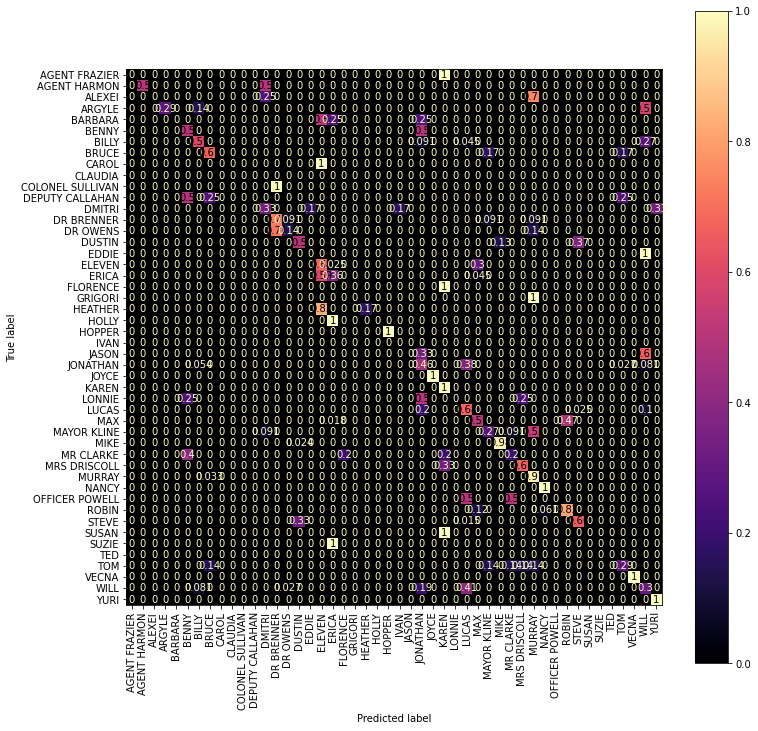

In [147]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plot
print('Classification report of imbalanced logistic regression \n',classification_report(y_test2,
                                                                                         y_pred_lg_model_tuned3,
                                                                                        zero_division = 0))

cm = confusion_matrix(y_test2,y_pred_lg_model_tuned3,normalize='true',
                      labels=lg_model_tuned_v3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lg_model_tuned_v3.classes_)
fig2, ax2 = plot.subplots(figsize=(12,12))
disp.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plt.grid(False)


In [148]:
#from sklearn.metrics import RocCurveDisplay
#RocCurveDisplay.from_predictions(y_test2,y_pred_lg_model_tuned3)

#plt.show()

In [149]:
#just checking liblinear
lg_model_tuned_v4 = LogisticRegression(max_iter = 500,
                              random_state=RANDOM_SEED,
                              solver = 'liblinear',penalty= 'l1',
                              C = 0.1).fit(X_train_scaler_final, y_train2)

y_pred_lg_model_tuned4 = lg_model_tuned_v4.predict(X_test_scaler_final)

accm_tuned4 = metrics.accuracy_score(y_test2,y_pred_lg_model_tuned3)

print(accm_tuned4)

acc_train4 = lg_model_tuned_v4.score(X_train_scaler_final, y_train2)

print(acc_train4)

0.7004310344827587
0.7658943965517241


Classification report of imbalanced logistic regression 
                   precision    recall  f1-score   support

   AGENT FRAZIER       0.00      0.00      0.00         1
    AGENT HARMON       1.00      0.50      0.67         2
          ALEXEI       0.00      0.00      0.00         4
          ARGYLE       1.00      0.29      0.44         7
         BARBARA       0.00      0.00      0.00         4
           BENNY       0.17      0.50      0.25         2
           BILLY       0.68      0.59      0.63        22
           BRUCE       0.57      0.67      0.62         6
           CAROL       0.00      0.00      0.00         2
COLONEL SULLIVAN       0.00      0.00      0.00         2
 DEPUTY CALLAHAN       0.00      0.00      0.00         4
          DMITRI       0.40      0.33      0.36         6
      DR BRENNER       0.53      0.73      0.62        11
        DR OWENS       0.33      0.14      0.20         7
          DUSTIN       0.63      0.50      0.56        82
           ED

Text(0.5, 1.0, 'Logistic Regression: Top 20 Characters only and All Features\nC: 1.0, solver:liblinear, penalty: L1, max_iter = 1000')

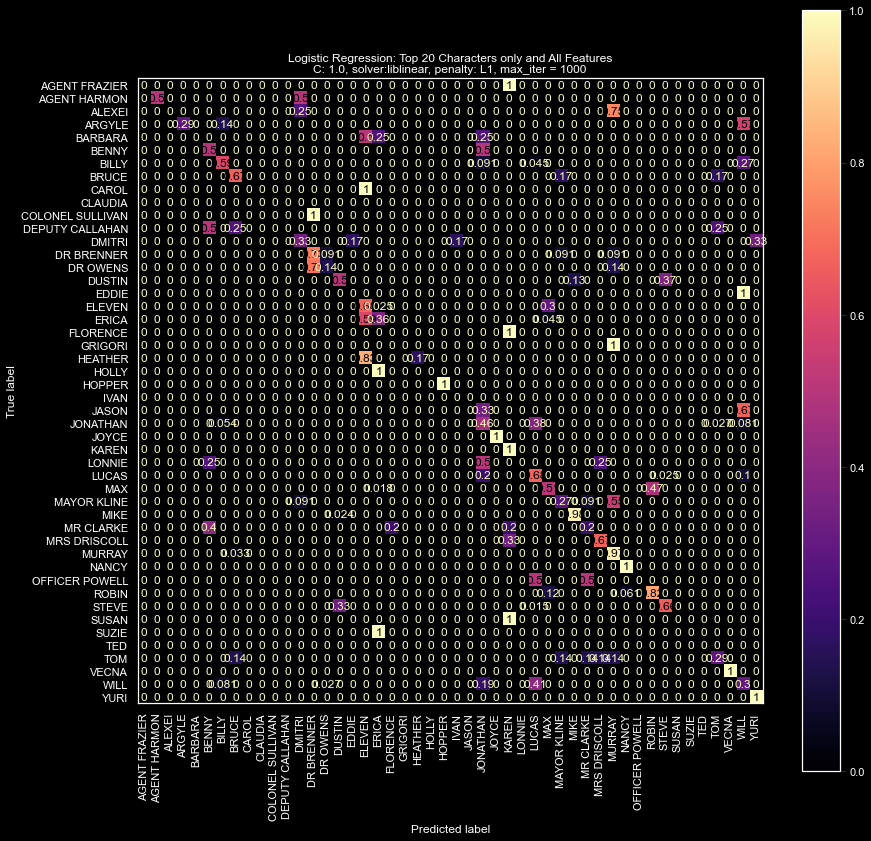

In [181]:
print('Classification report of imbalanced logistic regression \n',classification_report(y_test2,
                                                                                         y_pred_lg_model_tuned3,
                                                                                        zero_division = 0))

cm20v4 = confusion_matrix(y_test2,y_pred_lg_model_tuned3,normalize='true',
                      labels=lg_model_tuned_v4.classes_)
disp20v4 = ConfusionMatrixDisplay(confusion_matrix=cm20v4,
                              display_labels=lg_model_tuned_v4.classes_)
fig2, ax2 = plot.subplots(figsize=(14,14))
disp20v4.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plt.grid(False)
plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})
plt.title("Logistic Regression: Top 20 Characters only and All Features\nC: 1.0, solver:liblinear, penalty: L1, max_iter = 1000",
          {'fontsize': 12,'color': "white"})


### Liblinear had the same test score but slightly lower training we will keep with Saga

### Last filter to help the classification with features added to the data is to only use top 20 Characters, this value is based off length of lines spoken summed for a character across the entire data set.  Hopefully the classification will be helped by this filter on the data since it will have more lines to learn off of for a character. Where it is really failing on characters with not a lot of line or characters who have spoken to the same character often, example is Eleven and Karen Wheeler who speak to Mike often and in a similar manner.  While Karen is Mike's mother and Eleven is Mike's girlfriend - although Karen has less lines than Eleven both are still main characters and speak to Mike in a similar manner - for some reason this is not surprising this is happening.  

### It might be a nice add on to explore this failure by taking the characters and seeing their cosine similarity scores based on lines spoken compared to other characters for the Top 20.

In [150]:
train_top20_fin=train_df2_fin.copy()

train_top20_fin['TOP_20'] = train_top20_fin['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

print(len(top20chars))

train_top20_fin = train_top20_fin[train_top20_fin['TOP_20']==True].copy()

print(len(list(train_top20_fin.Character_Fix.unique())))

train_top20_fin.head()

20
20


index Character_Fix  Season  Episode  \
0   2858          MIKE       1        2   
2   2681         NANCY       3        1   
3   3106         KAREN       1        2   
4    774         BILLY       3        8   
5    474        HOPPER       3        8   

                                         token_lemma  Gender  Age  grade  \
0  i just i do feel good i wake up and my head it...       2    2    6.8   
2  no i mean i ca be late they like you no matter...       1    2    0.3   
3                                   i not mad at you       1    1   -1.9   
4  go the mind flayer tentacle have nearly envelo...       2    2    5.6   
5                          murray all set down there       2    1    0.5   

   difficulty  compound  sentiment  length_spk  Num  TOP_20  
0           1   -0.6469         -1          48  442    True  
2           0   -0.2023          0          15  309    True  
3           0    0.3875          0           5   87    True  
4           3    0.0000          0          12  116    True  
5           1    0.0000          0           5  501    True

In [151]:
train_top20_fin.groupby(['Character_Fix'])['length_spk'].min()

Character_Fix
BILLY          4
DR BRENNER     4
DR OWENS       4
DUSTIN         4
ELEVEN         4
ERICA          4
HOPPER         4
JONATHAN       4
JOYCE          4
KAREN          4
LUCAS          4
MAX            4
MAYOR KLINE    4
MIKE           4
MURRAY         4
NANCY          4
ROBIN          4
STEVE          4
TOM            7
WILL           4
Name: length_spk, dtype: int64

In [152]:
test_top20_fin=test_df2_fin.copy()

test_top20_fin['TOP_20'] = test_top20_fin['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

#print(len(top20chars))

test_top20_fin = test_top20_fin[test_top20_fin['TOP_20']==True].copy()

print(len(list(test_top20_fin.Character_Fix.unique())))

test_top20_fin.head()

20


Character_Fix  Season  Episode  \
3076         NANCY       1        2   
4260         LUCAS       4        8   
4296      JONATHAN       4        8   
2279          WILL       3        7   
1199           TOM       3        4   

                                            token_lemma  Gender  Age  grade  \
3076  nice the search party have move to the immedia...       1    2    6.6   
4260      we identify his most likely next victim lucas       2    2    6.4   
4296                sure you get your measurement right       2    2    2.1   
2279                         he build it to stop eleven       2    2    0.9   
1199  no as heather stand up billy kneel in front of...       2    1    0.5   

      difficulty  compound  sentiment  length_spk  Num  TOP_20  
3076          12    0.8720          1          45  309    True  
4260           3   -0.3321          0           8  216    True  
4296           1    0.3182          0           6  185    True  
2279           0   -0.2960          0           6  151    True  
1199           1   -0.5574         -1          16   30    True

In [153]:
vectorizer_final_top20 = TfidfVectorizer(min_df = 20, stop_words = 'english')
X_train_top20 = vectorizer_final_top20.fit_transform(train_top20_fin.token_lemma)
X_test_top20 = vectorizer_final_top20.transform(test_top20_fin.token_lemma)

y_train_top20=train_top20_fin['Character_Fix'].values
y_test_top20=test_top20_fin['Character_Fix'].values

#scaling since it is sparce and the tuner didnt like it not scaled at any variatio or 
#iteration before
X_scaler_top20 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_train_top20)
X_test_Scaler_top20 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_test_top20)

#adding features back on to both train and test
df_top20_fin = pd.DataFrame(X_scaler_top20.toarray(), \
                          columns=vectorizer_final_top20.get_feature_names_out())
train_top20_fin.reset_index(inplace=True)
X_train_20fin = pd.concat([df_top20_fin,train_top20_fin],axis=1)
X_train_20fin.drop(['token_lemma','index','TOP_20'], axis=1, inplace=True)

#doing the same to the test data-adding features back on
df_tf_test_fin = pd.DataFrame(X_test_Scaler_top20.toarray(), columns=vectorizer_final_top20.get_feature_names_out())
test_top20_fin.reset_index(inplace = True)
X_test_20fin = pd.concat([df_tf_test_fin,test_top20_fin],axis=1)
X_test_20fin.drop(['token_lemma','index','TOP_20'], axis=1, inplace=True)
#drpping character label names
X_test_20fin.drop(['Character_Fix'],axis=1,inplace = True)
X_train_20fin.drop(['Character_Fix'], axis=1, inplace=True)

In [154]:
X_train_20fin.isna().values.any()

False

In [155]:
X_test_20fin.isna().values.any()

False

### comment drop level_0 out if not needed be for shape error

In [156]:
#X_train_20fin

In [157]:
X_train_20fin.drop(['level_0'], axis=1, inplace=True)

In [158]:
lg_final_top20 = LogisticRegression(max_iter = 500,n_jobs=-1,
                              random_state=RANDOM_SEED,
                              solver = 'saga',penalty= 'l1',
                              C = 0.1).fit(X_train_20fin, y_train_top20)

y_pred_lg_top20 = lg_final_top20.predict(X_test_20fin)

accm20 = metrics.accuracy_score(y_test_top20,y_pred_lg_top20)
lg_model_scr20 = lg_final_top20.score(X_test_20fin, y_test_top20)

lg_model_Train_scr_top20 = lg_final_top20.score(X_train_20fin, y_train_top20)

print("Train Accuracy Score:",lg_model_Train_scr_top20)

print("Test Accuracy Score:",accm20)

print("Test Accuracy Score:",lg_model_scr20)

Train Accuracy Score: 0.5967164179104477
Test Accuracy Score: 0.45475910693301996
Test Accuracy Score: 0.45475910693301996


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Classification report of imbalanced logistic regression 
               precision    recall  f1-score   support

       BILLY       0.83      0.68      0.75        22
  DR BRENNER       0.67      0.73      0.70        11
    DR OWENS       1.00      0.43      0.60         7
      DUSTIN       0.62      0.62      0.62        82
      ELEVEN       0.68      0.53      0.59        40
       ERICA       1.00      0.86      0.93        22
      HOPPER       1.00      1.00      1.00       104
    JONATHAN       0.42      0.41      0.41        37
       JOYCE       1.00      1.00      1.00        64
       KAREN       1.00      1.00      1.00        19
       LUCAS       0.42      0.45      0.43        40
         MAX       0.53      0.62      0.57        55
 MAYOR KLINE       0.43      0.27      0.33        11
        MIKE       0.97      0.98      0.97        85
      MURRAY       0.83      0.97      0.89        30
       NANCY       0.95      0.95      0.95        62
       ROBIN       0.67

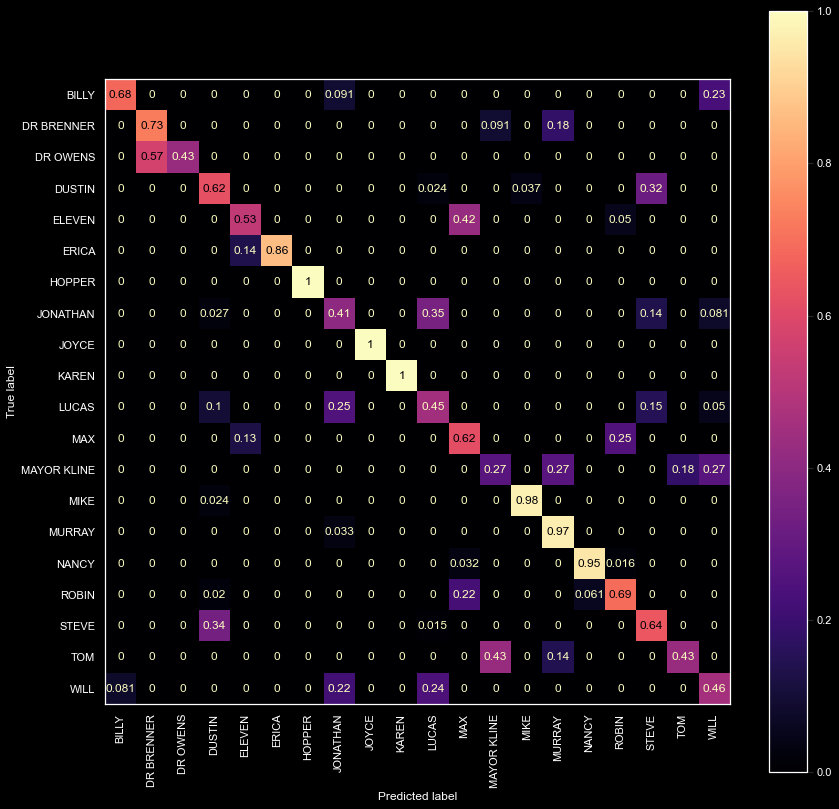

In [179]:
print('Classification report of imbalanced logistic regression \n',classification_report(y_test_top20,
                                                                                         y_pred_lg_top20,
                                                                                        zero_division = 0))

cm20v1 = confusion_matrix(y_test_top20,y_pred_lg_top20,normalize='true',
                      labels=lg_final_top20.classes_)
disp20v1 = ConfusionMatrixDisplay(confusion_matrix=cm20v1,
                              display_labels=lg_final_top20.classes_)
fig2, ax2 = plot.subplots(figsize=(14,14))
disp20v1.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plt.grid(False)

### The accuracy actually dropped removing characters that were not top 20.  We will have to explore this failure more later on.  The finalized matrix above, for looking at our results, is better on the eyes but we still need to retune since this is like a new dataset, since it was cut down and features were added. Like before when adding features and cutting down just words spoken it switched from liblinear to saga, this might vary well have new parameters to use.

In [160]:
param_grid_top20 = {'C': [0.01,0.1,0.5,1.0,5,10],
                'penalty':['l1','l2'],
                'solver':['liblinear','lbfgs','sag','saga'],
                }
#bow_search = model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
final_tune_top20 = model_selection.GridSearchCV(LogisticRegression(random_state = RANDOM_SEED,\
                                                              max_iter = 250),
                                                              param_grid=param_grid_top20,
                                                              scoring = 'accuracy',
                                                              cv = 2)

final_tune_top20.fit(X_train_20fin, y_train_top20)

print("Tuned Hyperparameters:", final_tune_top20.best_params_)
print("Accuracy:",final_tune_top20.best_score_)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/site-packages/sklearn/l

Tuned Hyperparameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7005970149253731


### So with the chopped down data set to only top 20 characters it is saying the accuracy could be 70% which is better but still doesnt make complete sense.  It is also saying the new solver should be liblinear.  We also need to check with class_weight =balanced and then the max_iter but we will do that when we figure out which data/features are best for our model. Also C is now 1.0 instead of 0.1 or 0.5.

In [161]:
lg_final_top20 = LogisticRegression(max_iter = 500,
                              random_state=RANDOM_SEED,
                              solver = 'liblinear',penalty= 'l1',
                              C = 1.0).fit(X_train_20fin, y_train_top20)

y_pred_lg_top20 = lg_final_top20.predict(X_test_20fin)

accm20 = metrics.accuracy_score(y_test_top20,y_pred_lg_top20)
lg_model_scr20 = lg_final_top20.score(X_test_20fin, y_test_top20)

lg_model_Train_scr_top20 = lg_final_top20.score(X_train_20fin, y_train_top20)

print("Train Accuracy Score:",lg_model_Train_scr_top20)

print("Test Accuracy Score:",accm20)

print("Test Accuracy Score:",lg_model_scr20)

Train Accuracy Score: 0.9319402985074627
Test Accuracy Score: 0.754406580493537
Test Accuracy Score: 0.754406580493537


Classification report of imbalanced logistic regression 
               precision    recall  f1-score   support

       BILLY       0.83      0.68      0.75        22
  DR BRENNER       0.67      0.73      0.70        11
    DR OWENS       1.00      0.43      0.60         7
      DUSTIN       0.62      0.62      0.62        82
      ELEVEN       0.68      0.53      0.59        40
       ERICA       1.00      0.86      0.93        22
      HOPPER       1.00      1.00      1.00       104
    JONATHAN       0.42      0.41      0.41        37
       JOYCE       1.00      1.00      1.00        64
       KAREN       1.00      1.00      1.00        19
       LUCAS       0.42      0.45      0.43        40
         MAX       0.53      0.62      0.57        55
 MAYOR KLINE       0.43      0.27      0.33        11
        MIKE       0.97      0.98      0.97        85
      MURRAY       0.83      0.97      0.89        30
       NANCY       0.95      0.95      0.95        62
       ROBIN       0.67

Text(0.5, 1.0, 'Logistic Regression: Top 20 Characters only and All Features\nC: 1.0, solver:liblinear, penalty: L1, max_iter = 1000')

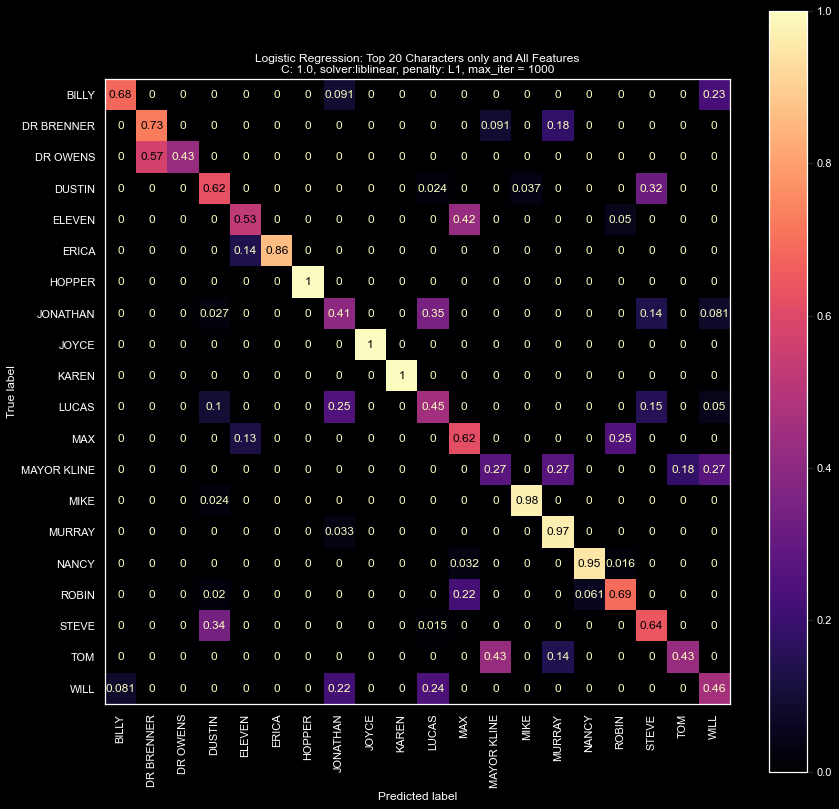

In [182]:
print('Classification report of imbalanced logistic regression \n',classification_report(y_test_top20,
                                                                                         y_pred_lg_top20,
                                                                                        zero_division = 0))

cm20v5= confusion_matrix(y_test_top20,y_pred_lg_top20,normalize='true',
                      labels=lg_final_top20.classes_)
disp20v5 = ConfusionMatrixDisplay(confusion_matrix=cm20v5,
                              display_labels=lg_final_top20.classes_)
fig2, ax2 = plot.subplots(figsize=(14,14))
disp20v5.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plt.grid(False)
plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})
plt.title("Logistic Regression: Top 20 Characters only and All Features\nC: 1.0, solver:liblinear, penalty: L1, max_iter = 1000",
          {'fontsize': 12,'color': "white"})


In [206]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
y = label_binarize(y_test_top20, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
n_classes = y.shape[1]
y_score = lg_final_top20.fit(X_train_20fin, y_train_top20).decision_function(X_test_20fin)

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning:

No positive samples in y_true, true positive val

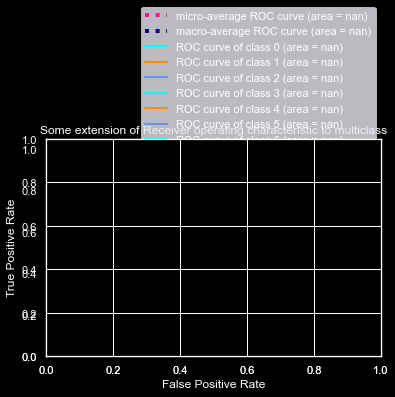

In [209]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
ax = plt.axes()
ax.set_facecolor("black")
plt.show()

In [203]:
tpr[2]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [188]:
### ROC AUC GRAPH
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y = label_binarize(y_test_top20, classes=[0, 1, 2])
n_classes = y.shape[1]

logit_roc_auc = roc_auc_score(y_test_top20, y_pred_lg_top20)
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_lg_top20[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: could not convert string to float: 'NANCY'

### Wow the test accuracy went up to 75.44% with using just rows/data for the top 20 characters in the show and the training score shot up to 93.1%.  Regardless of changes we make such a feature additions such as gender, age (age group), season, episode, text difficulty, text grade level, sentiment compound value, sentiment category based on compound value, length of token for a line, total num words spoken and removal of instances where the character spoke 3 words or less based on token_lemma length.

### Lets look at the correlation of the different features and categorize the character names

(4640, 12)
['Character_Fix']


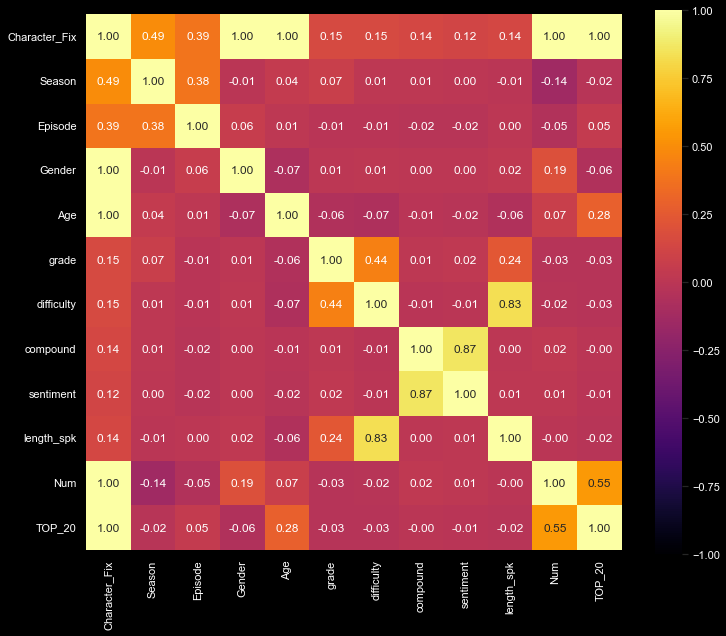

{'corr':                Character_Fix    Season   Episode    Gender       Age  \
 Character_Fix       1.000000  0.494903  0.387473  1.000000  1.000000   
 Season              0.494903  1.000000  0.384011 -0.006078  0.043230   
 Episode             0.387473  0.384011  1.000000  0.055306  0.014005   
 Gender              1.000000 -0.006078  0.055306  1.000000 -0.072709   
 Age                 1.000000  0.043230  0.014005 -0.072709  1.000000   
 grade               0.152737  0.071850 -0.008505  0.007776 -0.055783   
 difficulty          0.154191  0.009465 -0.013593  0.013168 -0.066315   
 compound            0.135174  0.010237 -0.015894  0.002223 -0.013818   
 sentiment           0.124143  0.004772 -0.016788  0.001705 -0.020397   
 length_spk          0.138263 -0.007762  0.000628  0.018665 -0.056638   
 Num                 1.000000 -0.139476 -0.054148  0.191477  0.072362   
 TOP_20              1.000000 -0.021343  0.045731 -0.055706  0.281704   
 
                   grade  difficulty  com

In [163]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

train_corre=train_df2_fin.copy()

train_corre['TOP_20'] = train_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)
test_corre=test_df2_fin.copy()

test_corre['TOP_20'] = test_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

check_corre = pd.concat([train_corre, test_corre], ignore_index=True, axis=0)

check_corre.drop(columns=['index','token_lemma'],axis = 1,inplace = True)

f = lambda x: 1 if x==True else 0
check_corre['TOP_20'] = check_corre['TOP_20'].apply(f)
print(check_corre.shape)
#!pip3 install dython

categorical_features=identify_nominal_columns(check_corre)
print(categorical_features)

associations(check_corre, nominal_columns='auto', 
             numerical_columns=None, mark_columns=False, 
             nom_nom_assoc='cramer', num_num_assoc='pearson', 
             cramers_v_bias_correction=True, nan_strategy=False,
             nan_replace_value=False, ax =sns.set(rc ={'xtick.labelcolor':'white',
                                                        'ytick.labelcolor':'white',
                                                       'figure.facecolor':'black'}),
             figsize=(12,10), annot=True, fmt='.2f', cmap="inferno",
             sv_color='black', cbar=True, vmax=1.0, vmin=None, plot=True,
             compute_only=False, clustering=False, title=None, filename=None)

### As we can see the Character Fix column does has correlation between the various features we added especially the season, episode, gender, age and num of words spoken in total along with top 20.  But we only kept where top 20 was True lets see what that correlation looks like on that dataframe instead, maybe we need to not filter out the data but run the model with the column as a feature in total.   

(4201, 12)
['Character_Fix']


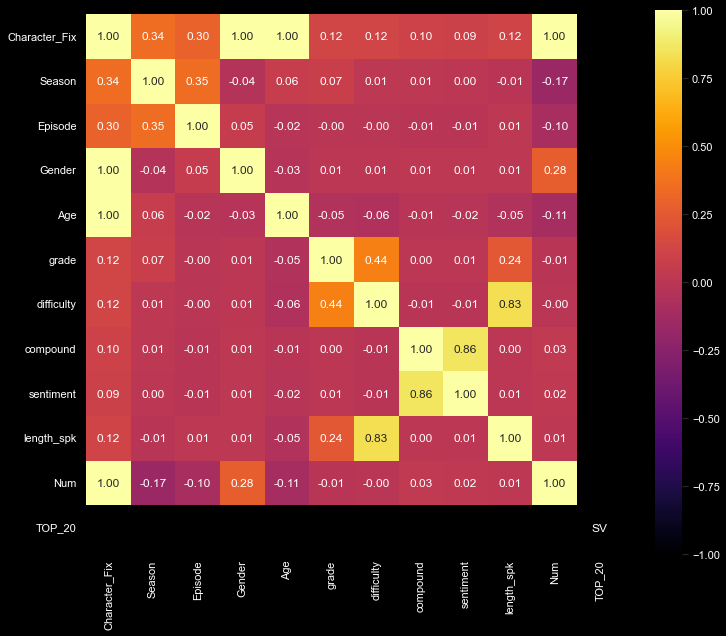

{'corr':                Character_Fix    Season   Episode    Gender       Age  \
 Character_Fix       1.000000  0.344454  0.295548  1.000000  1.000000   
 Season              0.344454  1.000000  0.346061 -0.038544  0.058444   
 Episode             0.295548  0.346061  1.000000  0.047220 -0.017570   
 Gender              1.000000 -0.038544  0.047220  1.000000 -0.025857   
 Age                 1.000000  0.058444 -0.017570 -0.025857  1.000000   
 grade               0.123508  0.070717 -0.003597  0.005235 -0.051219   
 difficulty          0.124998  0.014536 -0.000973  0.007740 -0.060944   
 compound            0.100097  0.014693 -0.010305  0.008403 -0.011551   
 sentiment           0.088480  0.004928 -0.013408  0.008881 -0.016351   
 length_spk          0.116627 -0.009877  0.008417  0.011692 -0.051105   
 Num                 1.000000 -0.168363 -0.099572  0.275224 -0.107688   
 TOP_20              0.000000  0.000000  0.000000  0.000000  0.000000   
 
                   grade  difficulty  com

In [164]:
train_20_corre = train_top20_fin.copy()
test_20_corre = test_top20_fin.copy()
train_20_corre['TOP_20'] = train_20_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

test_20_corre['TOP_20'] = test_20_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

check_corre20 = pd.concat([train_20_corre, test_20_corre], ignore_index=True, axis=0)

check_corre20.drop(columns=['level_0','index','token_lemma'],axis = 1,inplace = True)
print(check_corre20.shape)
f = lambda x: 1 if x==True else 0
check_corre20['TOP_20'] = check_corre20['TOP_20'].apply(f)

#!pip3 install dython

categorical_features20=identify_nominal_columns(check_corre20)
print(categorical_features20)

associations(check_corre20, nominal_columns='auto', 
             numerical_columns=None, mark_columns=False, 
             nom_nom_assoc='cramer', num_num_assoc='pearson', 
             cramers_v_bias_correction=True, nan_strategy=False,
             nan_replace_value=False, ax =sns.set(rc ={'xtick.labelcolor':'white',
                                                        'ytick.labelcolor':'white',
                                                       'figure.facecolor':'black'}),
             figsize=(12,10), annot=True, fmt='.2f', cmap="inferno",
             sv_color='black', cbar=True, vmax=1.0, vmin=None, plot=True,
             compute_only=False, clustering=False, title=None, filename=None)

### Some of the correlations are the same but some are lower for Character fix when just using top20 character data only, such as the drop in correlation for season and episode and the gender correlation to num of total lines spoken for a character was almost neutral a -0.06 but now its weighted at 0.28.  I think filter for just top 20 was not correct and we shoul have just left it as a feature instead.

### Running the model again but with top 20 as feature instead of a filter

In [165]:
#train_corre

In [166]:
#train_corre
#test_corre
vectorizer_final_model = TfidfVectorizer(min_df = 20, stop_words = 'english')
X_train_Final = vectorizer_final_model.fit_transform(train_corre.token_lemma)
X_test_Final = vectorizer_final_model.transform(test_corre.token_lemma)

y_train_Final=train_corre['Character_Fix'].values
y_test_Final=test_corre['Character_Fix'].values

#scaling since it is sparce and the tuner didnt like it not scaled at any variatio or 
#iteration before
X_scaler_Final = preprocessing.StandardScaler(with_mean=False).fit_transform(X_train_Final)
X_test_scaler_Final = preprocessing.StandardScaler(with_mean=False).fit_transform(X_test_Final)

#adding features back on to both train and test
df_Final = pd.DataFrame(X_scaler_Final.toarray(), \
                          columns=vectorizer_final_model.get_feature_names_out())
train_corre.reset_index(inplace=True)
X_train_Final_Model = pd.concat([df_Final,train_corre],axis=1)
X_train_Final_Model.drop(['token_lemma','index','TOP_20'], axis=1, inplace=True)

#doing the same to the test data-adding features back on
df_test_Final = pd.DataFrame(X_test_scaler_Final.toarray(), columns=vectorizer_final_model.get_feature_names_out())
test_corre.reset_index(inplace = True)
X_test_Final_Model = pd.concat([df_test_Final,test_corre],axis=1)
X_test_Final_Model.drop(['token_lemma','index','TOP_20'], axis=1, inplace=True)
#drpping character label names
X_test_Final_Model.drop(['Character_Fix'],axis=1,inplace = True)
X_train_Final_Model.drop(['Character_Fix'], axis=1, inplace=True)

In [167]:
X_train_Final_Model.drop(['level_0'], axis=1, inplace=True)

In [168]:
#X_test_Final_Model.drop(['level_0'],axis=1,inplace = True)

In [169]:
lg_final_features = LogisticRegression(max_iter = 500,
                              random_state=RANDOM_SEED,
                              solver = 'liblinear',penalty= 'l1',
                              C = 1.0).fit(X_train_Final_Model, y_train_Final)

y_pred_FINALft = lg_final_features.predict(X_test_Final_Model)

accmfin = metrics.accuracy_score(y_test_Final,y_pred_FINALft)
lg_model_scrfin = lg_final_features.score(X_test_Final_Model, y_test_Final)

lg_model_Train_scr_Final = lg_final_features.score(X_train_Final_Model, y_train_Final)

print("Train Accuracy Score:",lg_model_Train_scr_Final)

print("Test Accuracy Score:",accmfin)

print("Test Accuracy Score:",lg_model_scrfin)

Train Accuracy Score: 0.9205280172413793
Test Accuracy Score: 0.6713362068965517
Test Accuracy Score: 0.6713362068965517


Classification report of imbalanced logistic regression 
                   precision    recall  f1-score   support

   AGENT FRAZIER       0.00      0.00      0.00         1
    AGENT HARMON       1.00      0.50      0.67         2
          ALEXEI       0.25      0.25      0.25         4
          ARGYLE       0.33      0.14      0.20         7
         BARBARA       0.50      0.50      0.50         4
           BENNY       0.33      0.50      0.40         2
           BILLY       0.56      0.64      0.60        22
           BRUCE       0.67      0.67      0.67         6
           CAROL       0.00      0.00      0.00         2
COLONEL SULLIVAN       0.00      0.00      0.00         2
 DEPUTY CALLAHAN       0.00      0.00      0.00         4
          DMITRI       0.17      0.17      0.17         6
      DR BRENNER       0.58      0.64      0.61        11
        DR OWENS       0.33      0.14      0.20         7
          DUSTIN       0.60      0.60      0.60        82
           ED

Text(0.5, 1.0, 'Logistic Regression: Top 20 Characters only and All Features\nC: 1.0, solver:liblinear, penalty: L1, max_iter = 1000')

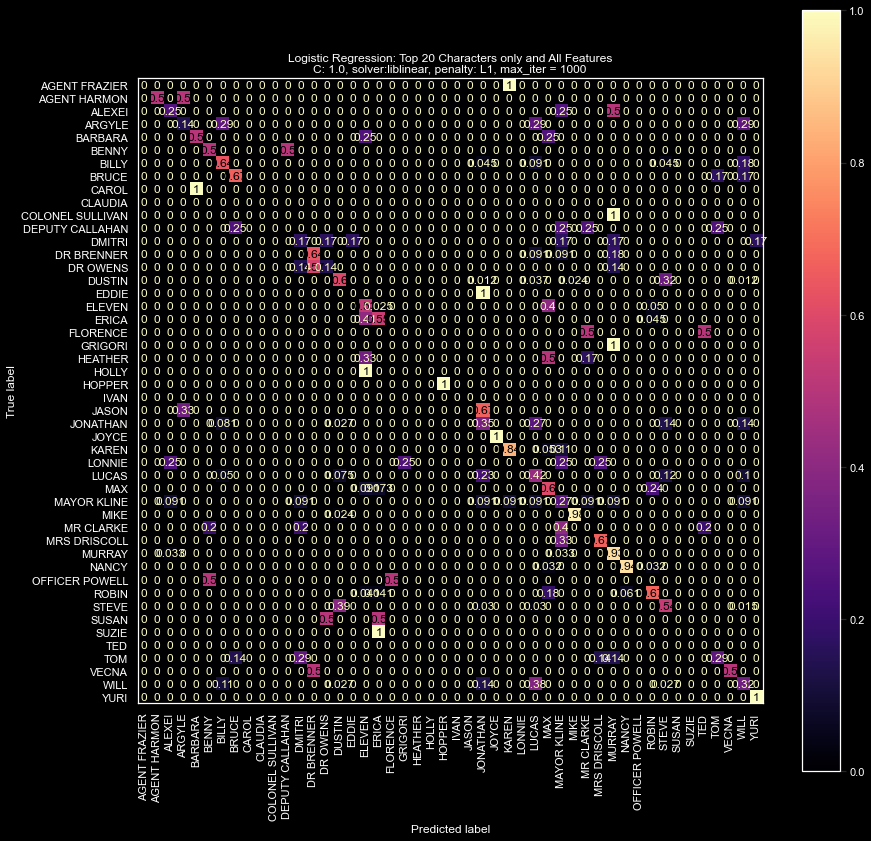

In [178]:
print('Classification report of imbalanced logistic regression \n',classification_report(y_test_Final,y_pred_FINALft,
                                                                                        zero_division = 0))

cm20v2 = confusion_matrix(y_test_Final,y_pred_FINALft,normalize='true',
                      labels=lg_final_features.classes_)
disp20v2 = ConfusionMatrixDisplay(confusion_matrix=cm20v2,
                              display_labels=lg_final_features.classes_)
fig2, ax2 = plot.subplots(figsize=(14,14))
disp20v2.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plt.grid(False)
plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})
plt.title("Logistic Regression: Top 20 Characters only and All Features\nC: 1.0, solver:liblinear, penalty: L1, max_iter = 1000",
          {'fontsize': 12,'color': "white"})

### Not bad for keeping all the characters (but it did drop a bit), all the featues and using top 20 as a feature instead of a filter but I think we will keep the top 20 as a filter with all the features since overall it performed the best so far at 76% on test data.

### Failure Analysis or Reasoning for mismarked lines spoken by a charcter

### checking cosine similarity to see why certain characters lines are being picked up by a different characters

In [170]:
sentiment_df = sent_dict[['Character_Fix','Dialog_clean','compound']].copy()
vectorizer_sentiment = TfidfVectorizer(stop_words = 'english')
sent_vect = vectorizer_sentiment.fit_transform(sentiment_df.Dialog_clean)


#adding features back on to both train and test
df_s = pd.DataFrame(sent_vect.toarray(), \
                          columns=vectorizer_sentiment.get_feature_names_out())
#train_corre.reset_index(inplace=True)
sentiment_send = pd.concat([sentiment_df,df_s],axis=1)
sentiment_send.drop(['Dialog_clean'], axis=1, inplace=True)
sentiment_send_fin = pd.merge(left = sentiment_send,right =gender, on=['Character_Fix'])
sentiment_send_fin['Age'] = sentiment_send_fin['Age'].apply(lambda x: 1 if x=="Female" \
                                                     else(2 if x=="Negative" \
                                                     else 0))

In [171]:
#sentiment_send.set_index('Character_Fix')

In [172]:
from sklearn.metrics.pairwise import cosine_similarity
#from scipy.spatial.distance import cosine

def calc_cos_sim(df):
    """
    Takes in a DataFrame and computes all pairwise Cosine Similarity
    """
    s = pd.Series(['BILLY', 'DUSTIN', 'ELEVEN', 'ERICA', 'HOPPER', 'JONATHAN',
       'JOYCE', 'KAREN', 'LUCAS', 'MAX', 'MAYOR KLINE', 'MIKE', 'MURRAY',
       'NANCY', 'ROBIN', 'STEVE', 'TOM', 'WILL'])
    cols = df.columns.to_list()
    cos_sim_df = pd.DataFrame(cosine_similarity(df),columns=s)
    cos_sim_df.set_index([s])
    
    return cos_sim_df.set_index([s]).fillna(1.0)

fail_analysis_reason = calc_cos_sim(sentiment_send.set_index('Character_Fix'))

### make final dataframe of different score iterations for comparison in report and to other classification models we use/test

In [173]:
fail_analysis_reason.to_csv("sentiment_sim_fail_label.csv")